In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

In [65]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data exploration

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
# The dropna() method removes the rows that contains NULL values.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Split data into train and test data

In [68]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [69]:
train_data = data

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

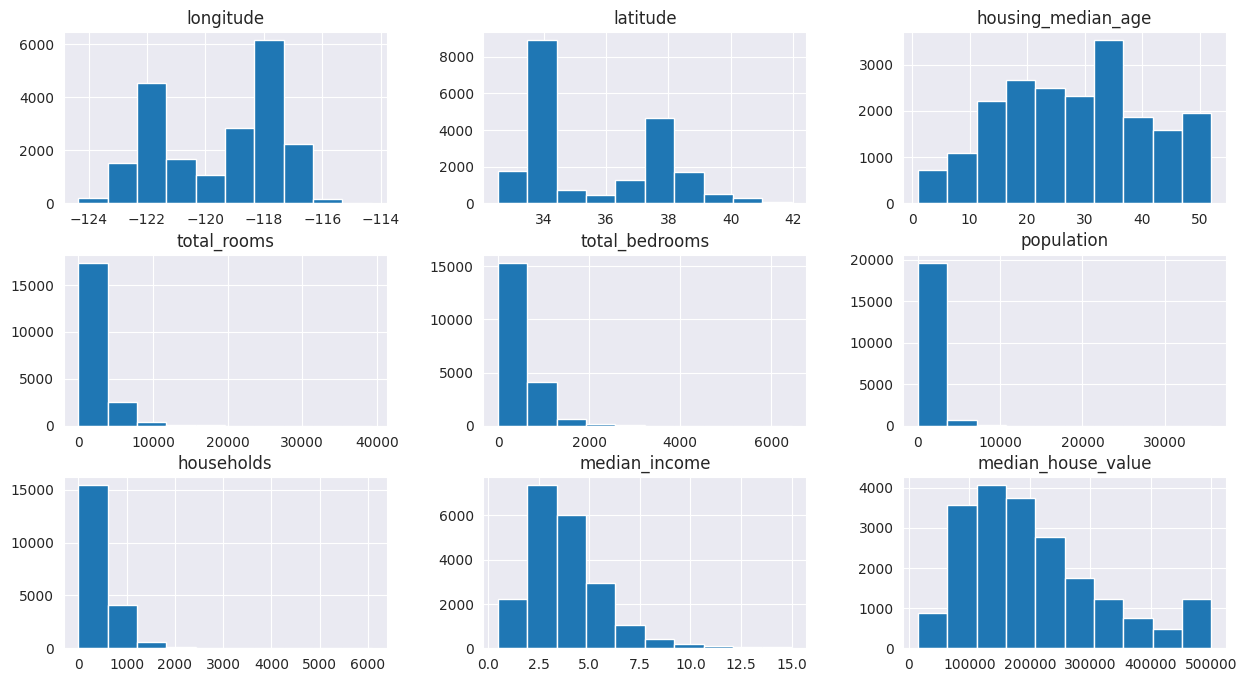

In [70]:
train_data.hist(figsize=(15, 8))

<Axes: >

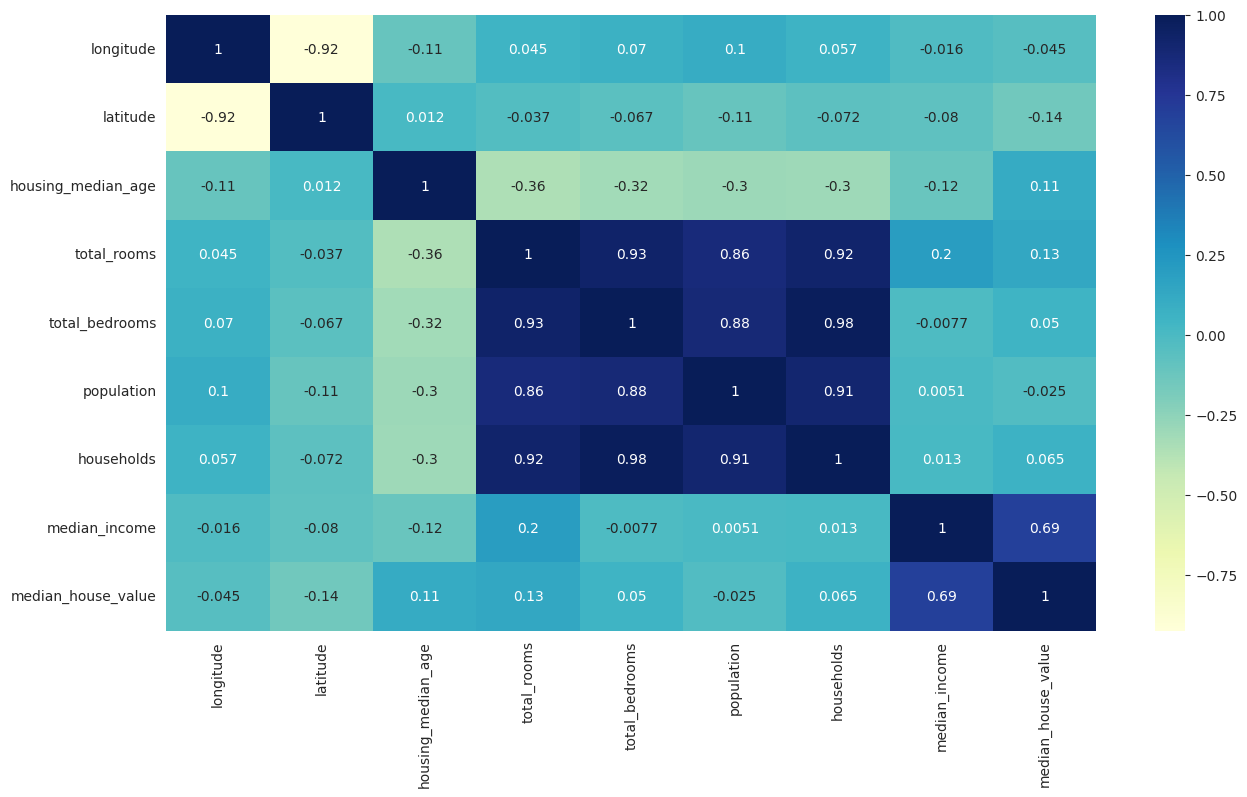

In [71]:
# select numeric data for calculating correlation 
plt.figure(figsize=(15, 8))
corrs = train_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corrs, annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

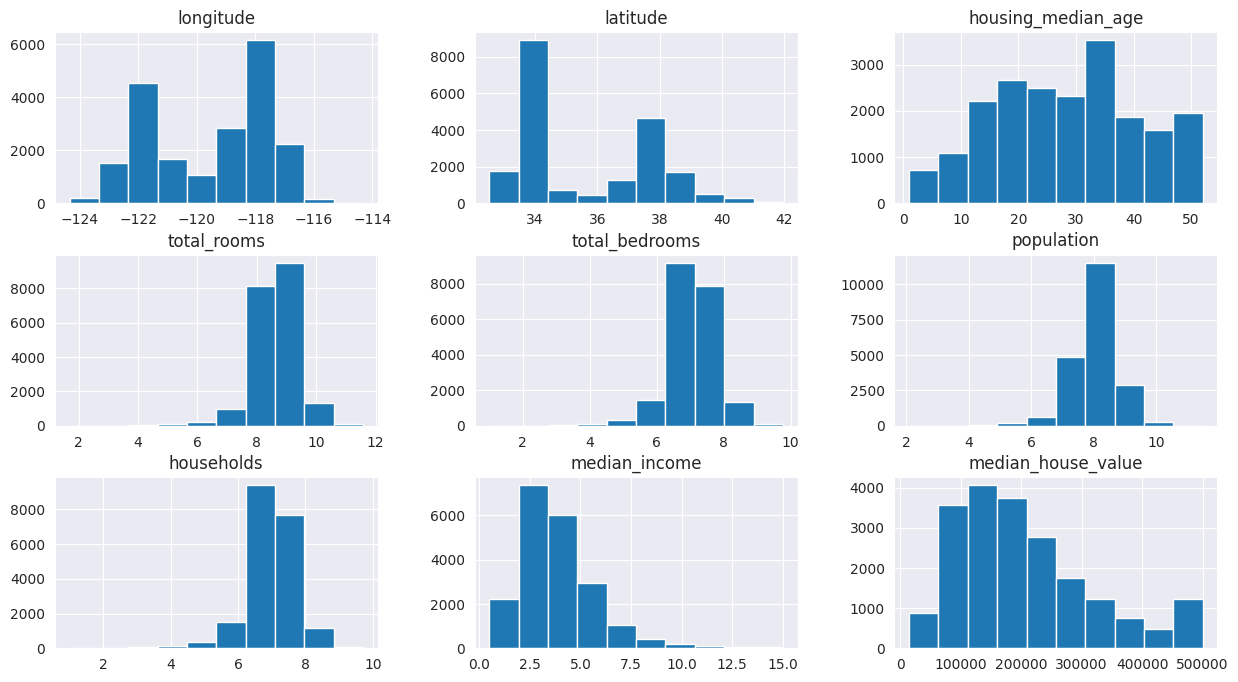

In [72]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1 
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) +1
 
train_data.hist(figsize=(15, 8))

In [73]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data['<1H OCEAN']=train_data['<1H OCEAN'].astype(int)
train_data['INLAND']=train_data['INLAND'].astype(int)
train_data['ISLAND']=train_data['ISLAND'].astype(int)
train_data['NEAR BAY']=train_data['NEAR BAY'].astype(int)
train_data['NEAR OCEAN']=train_data['NEAR OCEAN'].astype(int)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,7.779922,5.859812,6.774552,5.836282,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,9.867709,8.008505,8.783641,8.037028,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,8.290975,6.247024,7.206576,6.176150,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,8.149917,6.459586,7.324359,6.389072,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,8.394493,6.634790,7.336826,6.556828,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,8.417580,6.924256,7.739337,6.799093,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,7.546785,6.010635,6.874931,5.736198,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,8.720462,7.184149,7.914731,7.070738,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,8.528332,7.013715,7.608001,6.855072,1.8672,84700.0,0,1,0,0,0


## Heatmap after modification

<Axes: >

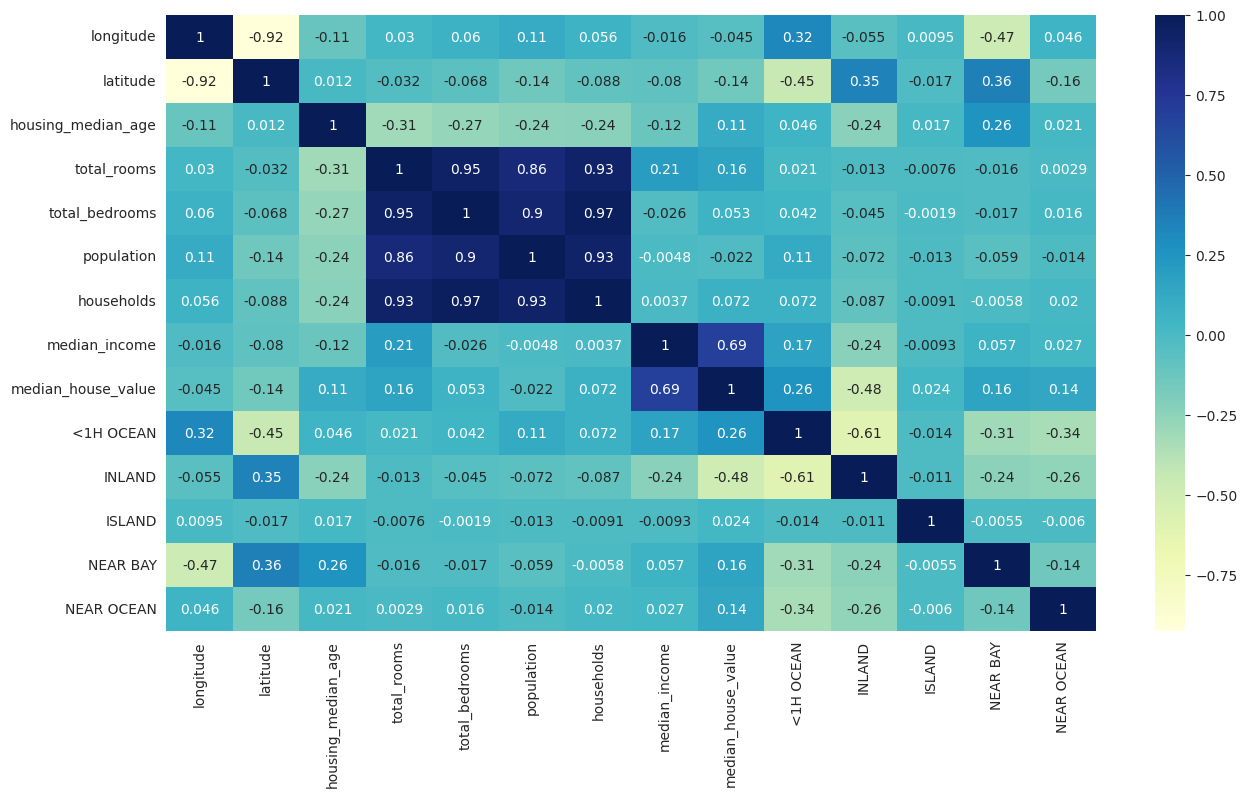

In [74]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Some feature engineering

<Axes: >

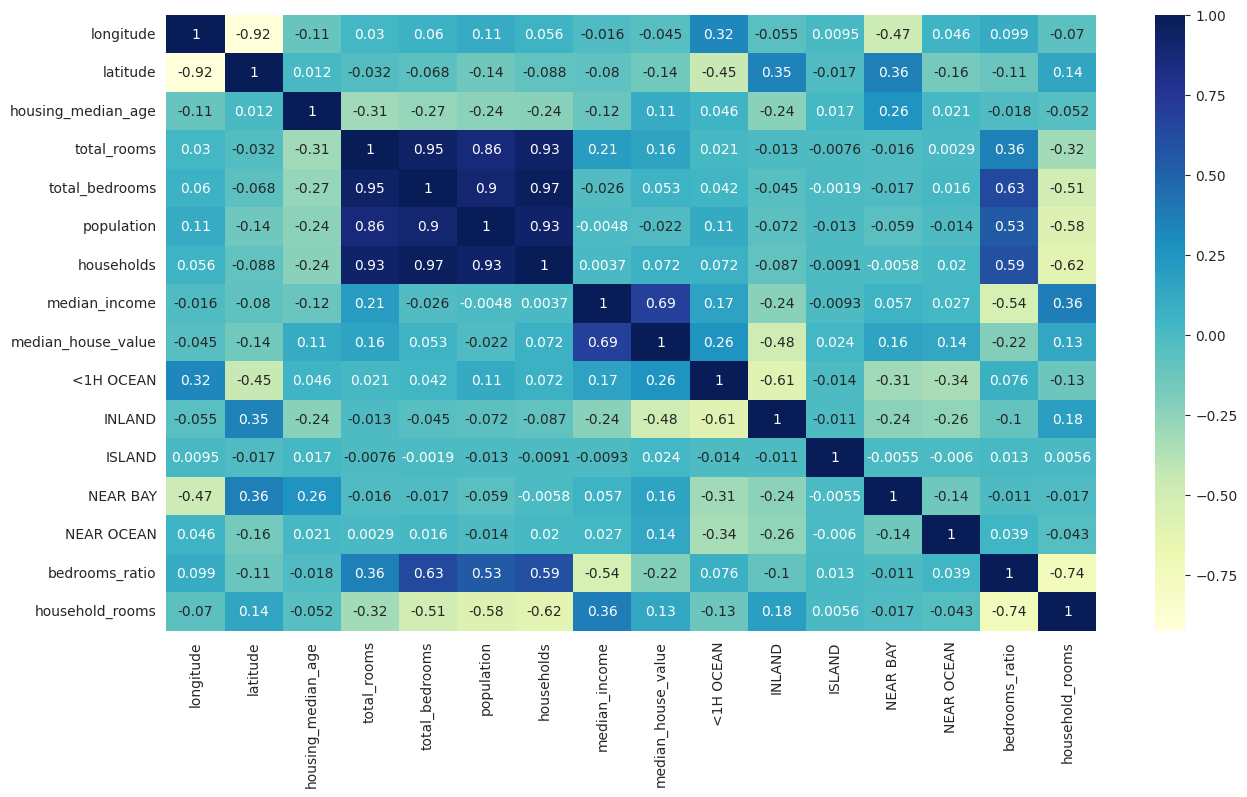

In [79]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

## show heatmap 
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [117]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Time for Gradient descent

In [118]:
def predict(x, w, b):
    """
    Predicts values using the linear model
    """
    return np.dot(x, w) + b

def compute_gradient(x, y, w, b):
    """
    Computes the gradient of the cost function
    """
    m, n = x.shape
    
    predictions = predict(x, w, b)
    errors = predictions - y
    
    dj_dw = (1 / m) * np.dot(x.T, errors)
    dj_db = (1 / m) * np.sum(errors)
    
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):
    """
    Performs gradient descent to learn w and b
    """
    for _ in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
    return w, b

array([176338.07681795, 175506.02364127, 123902.86733553, ...,
       165054.80832612, 218909.32565597, 242611.27335052])

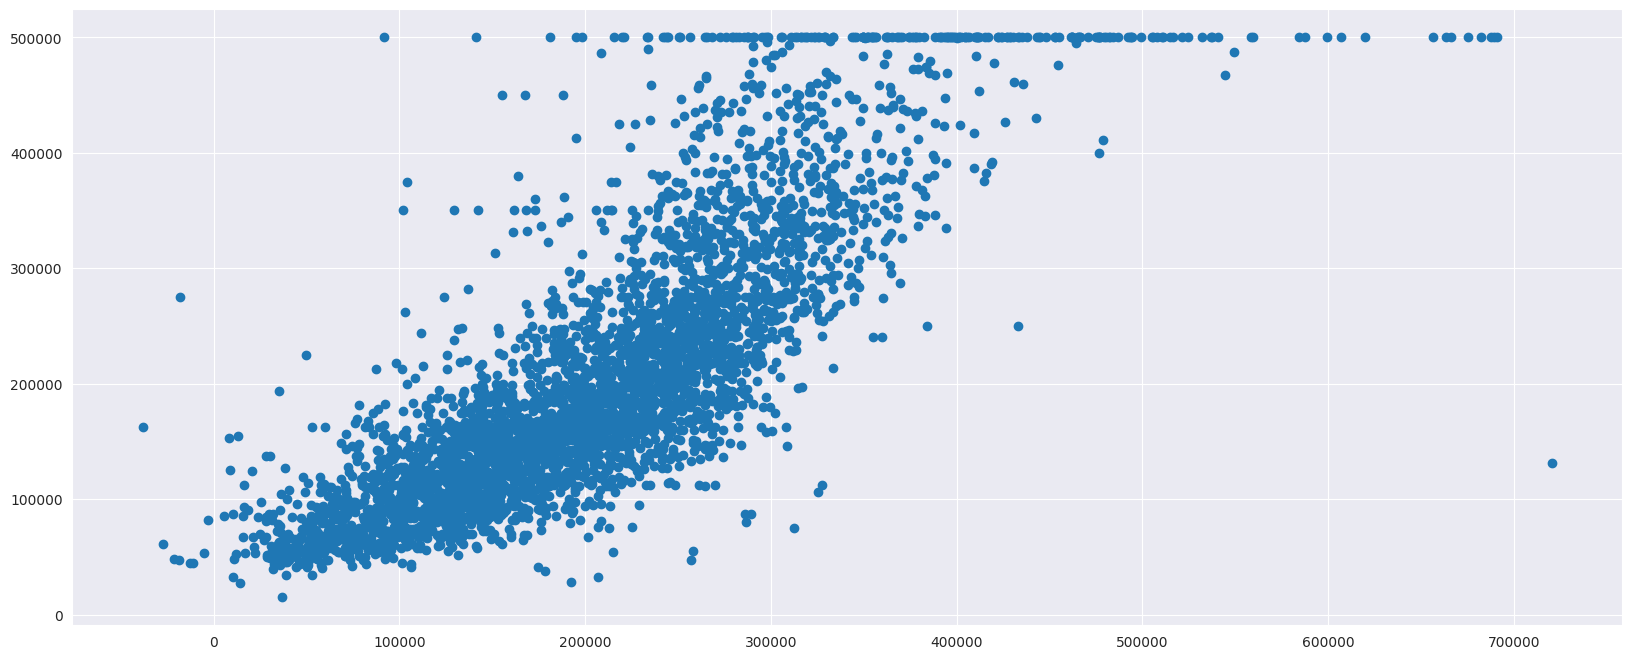

In [123]:

# w_in = np.zeros((X_train.shape[0], )), b = 0
# w, b = gradient_descent(X_train, y_train, w, b, alpha=0.01, iterations=100)

# print(w, b)

w_in = np.zeros(X_train.shape[1])
b_in = 0

w, b = gradient_descent(X_train, y_train, w_in, b_in, alpha=0.01, iterations=10000)


## Time for test

array([176338.07681795, 175506.02364127, 123902.86733553, ...,
       165054.80832612, 218909.32565597, 242611.27335052])

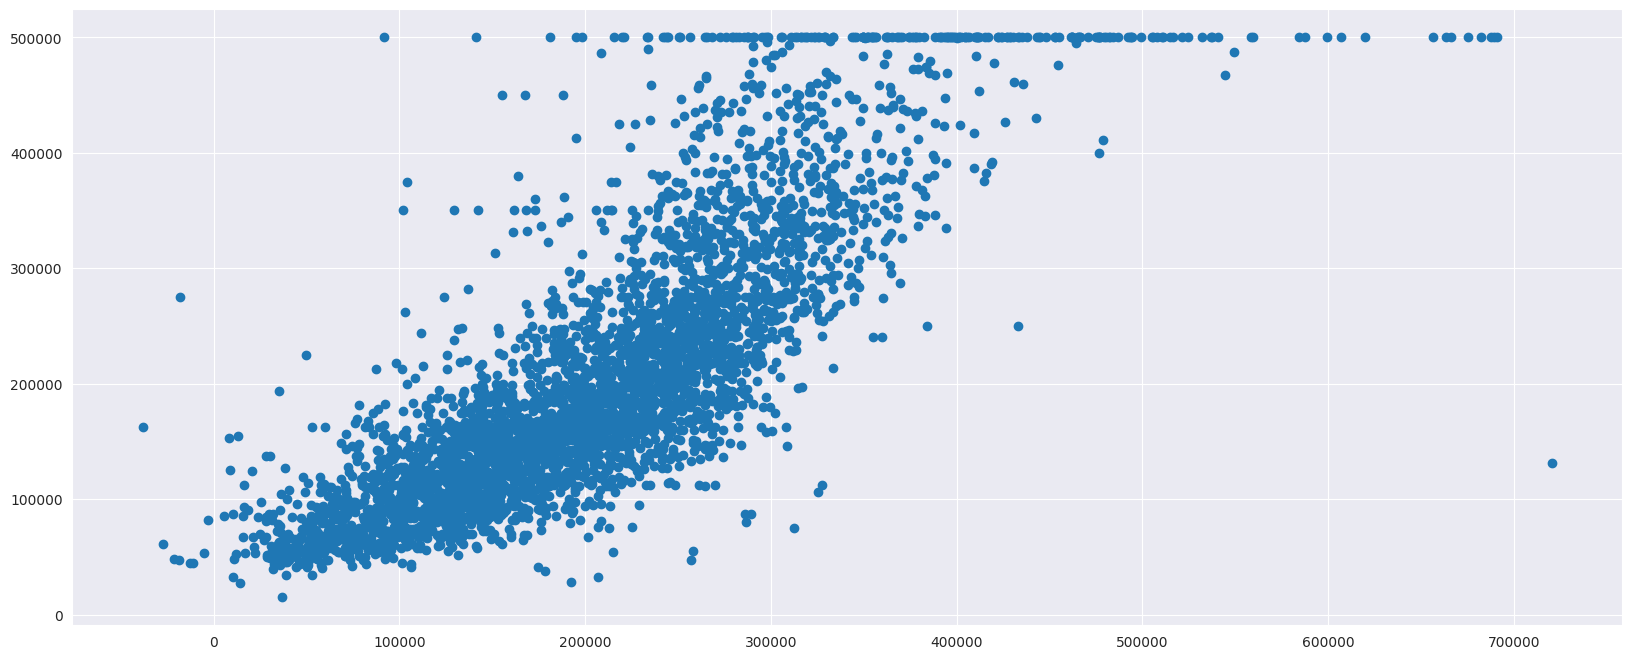

In [124]:
predictions = predict(X_test, w, b)

plt.figure(figsize=(20, 8))
plt.scatter(predictions, y_test)
predictions